<a href="https://colab.research.google.com/github/JOAOPEDRO2018/Jp_DataScience/blob/dados/Analisando%20dados%20COVID%20-19%20no%20Brasil%20e%20no%20Mundo_modulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do Covid-19 no Brasil e no Mundo.

Segundo o Ministério da Saúde, a Covid-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, com muitos casos graves e alta taxa de transmissibilidade, culminou em uma pandemia global. SARS-CoV deve sua origem no sul da China, os primeiros casos foram identificados em 2002 como uma incomum epidemia de pneumonia em Foshan, Guangdong, China, esse surto foi identificado como uma Síndrome Respiratória Aguda (SARS) um ano depois foi identificado um novo CoV como sendo o causador da SARS, CoV faz parte da família de Coronavírus que são um grupo de vírus de RNA de fita simples, com alta mutação, que causam doenças respiratórias, hepáticas e neurológicas com uma gravidade muito variável não somente em humanos, mas também em uma gama variada de animais, a nova doença então foi denominada  como SARS-CoV.


<center><img alt="Colaboratory logo" width="90%" src="https://www.unicef.org/brazil/sites/unicef.org.brazil/files/styles/hero_mobile/public/warao-manaus_michell-mello.jpg"></center>


Em 2019 um novo surto de SARS apareceu em Wuhan, na província de Hubei, na China, a princípio com causas desconhecidas, infectando mais de 9 mil pessoas na China com 213 mortes e infectando 106 pessoas em 19 outros países até 31 de janeiro de 2020. Poucos dias depois a causa foi identificada como sendo um novo coronavírus, a princípio denominado de coronavírus-2 (SARS-CoV-2) e batizado pela Organização Mundial de Saúde de Coronavírus 2019 (Covid-19)

###Contextualização

O objetivo desta análise é visualizar de forma interativa a partir de gráficos, quais foram o impacto do COVID-19 no Mundo e, como o dados do Brasil se comparam com o resto do Mundo.

###Obtendo os dados

####Imports

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

####Analisando os Dados


In [321]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


``df.info`` é util para entender como os dados estão distribuidos no dataset, no caso vemos que existe uma coluna ``date`` que pode ser transformada para o tipo data e ser usada como index, além de já ter uma previa de da quantidade de valores nulos em cada coluna.

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104802 entries, 0 to 104801
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               104802 non-null  object 
 1   continent                              99926 non-null   object 
 2   location                               104802 non-null  object 
 3   date                                   104802 non-null  object 
 4   total_cases                            100604 non-null  float64
 5   new_cases                              100601 non-null  float64
 6   new_cases_smoothed                     99591 non-null   float64
 7   total_deaths                           90311 non-null   float64
 8   new_deaths                             90466 non-null   float64
 9   new_deaths_smoothed                    99591 non-null   float64
 10  total_cases_per_million                100070 non-null  

In [323]:
#tranformar coluna data para datetime, assim o dataset ficará mais organizado
df['date'] = pd.to_datetime(df['date'])

In [324]:
#Atribuindo a coluna date como index
df.set_index('date', inplace=True)

In [325]:
df.tail(5)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-07-20,ZWE,Africa,Zimbabwe,88415.0,2683.0,2163.429,2747.0,50.0,67.571,5948.694,180.516,145.559,184.822,3.364,4.546,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11254.0,844625.0,56.828,0.757,11166.0,0.751,0.194,5.2,tests performed,1897337.0,1247494.0,649843.0,69699.0,45971.0,12.77,8.39,4.37,3093.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
2021-07-21,ZWE,Africa,Zimbabwe,91120.0,2705.0,2105.571,2809.0,62.0,68.143,6130.690,181.996,141.666,188.994,4.171,4.585,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12636.0,857261.0,57.678,0.850,11171.0,0.752,0.188,5.3,tests performed,1949472.0,1292642.0,656830.0,52135.0,47976.0,13.12,8.70,4.42,3228.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
2021-07-22,ZWE,Africa,Zimbabwe,93421.0,2301.0,2078.429,2870.0,61.0,64.571,6285.505,154.815,139.840,193.098,4.104,4.344,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14987.0,872248.0,58.686,1.008,10365.0,0.697,0.201,5.0,tests performed,2017101.0,1352514.0,664587.0,67629.0,50034.0,13.57,9.10,4.47,3366.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
2021-07-23,ZWE,Africa,Zimbabwe,95686.0,2265.0,2074.000,2961.0,91.0,63.000,6437.897,152.393,139.542,199.221,6.123,4.239,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
2021-07-24,ZWE,Africa,Zimbabwe,97277.0,1591.0,2094.857,3050.0,89.0,66.000,6544.942,107.045,140.945,205.209,5.988,4.441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


####Mapa de Variáveis
Já tranformamos a coluna de data para Datetime e definimos como index, agora a próxima etapa será entender o que cada coluna significa para isso será criado um mapa para o entendimento do mesmo.




``iso_code``:(International Organization for Standardization) significa o código do país

``continent``: Continente local

``location``: País local

``date``: Data da observação

``total_cases``: Total de casos de COVID-19

``new_cases``: Novos casos confirmados de COVID-19

``new_cases_smoothed``: Novos casos com suavização de 7 dias

``total_deaths``: Total de mortes pela COVID-19

``new_deaths``: Novas mortes pela COVID-19

``new_deaths_smoothed``:Novas mortes com suavização de 7-dias

``total_cases_per_million``: Total de casos por milhão

``new_cases_per_million``: Novos casos por milhão

``new_cases_smoothed_per_million``: Novos casos por milhão com suavização de 7-dias

``total_deaths_per_million``: Total de mortes por milhão

``new_deaths_per_million``: Novas mortes por milhão

``new_deaths_smoothed_per_million``: Novas mortes por milhão com suavização de 7-dias

``reproduction_rate``: Estimativa em tempo real da taxa de reprodução efetiva (R) da COVID-19.

``icu_patients``: Número de pacientes COVID-19 em unidades de terapia intensiva (UTIs) no mesmo dia

``icu_patients_per_million``: Número de pacientes COVID-19 em unidades de terapia intensiva (UTIs) no mesmo dia, por milhão.

``hosp_patients``: Número de pacientes da COVID-19 no hospital em um determinado dia.

``hosp_patients_per_million``: Número de pacientes da COVID-19 no hospital em um determinado dia, por milhão.

``weekly_icu_admissions``: Número de pacientes COVID-19 recém admitidos em unidades de terapia intensiva (UTIs) na mesma semana.

``weekly_icu_admissions_per_million`` Número de pacientes COVID-19 recém admitidos em unidades de terapia intensiva (UTIs) na mesma semana, por milhão.

``weekly_hosp_admissions``:	Número de pacientes COVID-19 recém admitidos em hospitais na mesma semana

``weekly_hosp_admissions_per_million``:	Número de pacientes COVID-19 recém admitidos em hospitais na mesma semana, por milhão. 

``total_tests``: Total de teste de COVID-19 realizados

``new_tests``: Novos testes para a COVID-19 (apenas calculados para dias consecutivos)

``total_tests_per_thousand``: Total de testes por mil

``new_tests_per_thousand``Novos testes de COVID-19 por mil

``new_tests_smoothed``: Novos testes para COVID-19, suavizado.

``new_tests_smoothed_per_thousand``: Novos testes para COVID-19, suavizados, por mil.

``positive_rate``: A parte dos testes de COVID-19 que são positivos, dada como média móvel de 7 dias.

``tests_per_case``: Testes realizados por novo caso confirmado de COVID-19, dado como uma média móvel de 7 dias.

``tests_units``: Tipos de unidades usadas pelo local para relatar seus dados de teste

``total_vaccinations``: Número total de doses de vacinação COVID-19 administradas

``people_vaccinated``: Número total de pessoas que receberam pelo menos uma dose de vacina

``people_fully_vaccinated``: Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação

``new_vaccinations``: Novas doses de vacinação COVID-19 administradas (calculadas apenas para dias consecutivos)

``new_vaccinations_smoothed``: Novas doses de vacinação COVID-19 administradas (7 dias de suvização).

``total_vaccinations_per_hundred``: Número total de doses de vacinação COVID-19 administradas por 100 pessoas na população total

``people_vaccinated_per_hundred``: Número total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas na população total

``people_fully_vaccinated_per_hundred``: Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação por 100 pessoas na população total

``new_vaccinations_smoothed_per_million``: Novas doses de vacinação COVID-19 administradas (suavizadas em 7 dias) por milhão de pessoas na população total

``stringency_index``: Índice de Restrição de Resposta do Governo: medida composta com base em 9 indicadores de resposta (fechamentos de escolas, fechamentos de locais de trabalho e proibições de viagens, etc) valores de 0 a 100 (100 = resposta mais estrita)

``population``: População em 2020

``population_density``: Densidade populacional(Número de pessoas dividido por área, medido em quilômetros quadrados)

``median_age``:Idade média da população

``aged_65_older``: Parcela da população com 65 anos ou mais

``aged_70_older``: Parcela da população com 70 anos ou mais em 2015

``gdp_per_capita``: Produto interno bruto em paridade de poder de compra

``extreme_poverty``: Parcela da população que vive em pobreza extrema, ano mais recente disponível desde 2010

``cardiovasc_death_rate``: Taxa de mortalidade por doenças cardiovasculares em 2017 

``diabetes_prevalence``: Prevalência de diabetes (% da população de 20 a 79 anos) em 2017

``female_smokers``: Parcela de mulheres que fumam, ano mais recente disponível

``male_smokers``: Parcela de homens que fumam, ano mais recente disponível

``handwashing_facilities``: Parcela da população com instalações básicas para lavagem das mãos no local

``hospital_beds_per_thousand``: Leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010

``life_expectancy``: Expectativa de vida ao nascer em 2019

``human_development_index``: Indice de desenvolvimento humano

###Tratamento dos Dados



> O dataset possue muitos dados, o que é bom para uma analise bem fundamentada e geração de insights, porém é importante resaltar se todas essas linhas estão prenchidas.




In [326]:
df.shape

(104802, 59)



> Importante analisar a porcentagem de valores nulos do dataset, neste exemplo é possível ver que algumas colunas chegam a ter níveis muito altos de valores NaN, para nossa análise a melhor opção é excluí-los. 



In [327]:
#Chegado porcentagem de elementos nulos
#df.isnull().sum()/df.shape[0]*100
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

weekly_icu_admissions                    99.078262
weekly_icu_admissions_per_million        99.078262
weekly_hosp_admissions                   98.358810
weekly_hosp_admissions_per_million       98.358810
excess_mortality                         96.497204
icu_patients                             89.647144
icu_patients_per_million                 89.647144
hosp_patients                            87.492605
hosp_patients_per_million                87.492605
people_fully_vaccinated_per_hundred      85.275090
people_fully_vaccinated                  85.275090
new_vaccinations                         84.760787
people_vaccinated                        82.485067
people_vaccinated_per_hundred            82.485067
total_vaccinations_per_hundred           81.708364
total_vaccinations                       81.708364
new_vaccinations_smoothed_per_million    68.050228
new_vaccinations_smoothed                68.050228
total_tests                              55.658289
total_tests_per_thousand       

In [328]:
#Quantidade de valores nulos em cada tabela
df.isnull().sum()

iso_code                                      0
continent                                  4876
location                                      0
total_cases                                4198
new_cases                                  4201
new_cases_smoothed                         5211
total_deaths                              14491
new_deaths                                14336
new_deaths_smoothed                        5211
total_cases_per_million                    4732
new_cases_per_million                      4735
new_cases_smoothed_per_million             5740
total_deaths_per_million                  15012
new_deaths_per_million                    14857
new_deaths_smoothed_per_million            5740
reproduction_rate                         20170
icu_patients                              93952
icu_patients_per_million                  93952
hosp_patients                             91694
hosp_patients_per_million                 91694
weekly_icu_admissions                   

In [329]:
#quantidade de linhas
df.shape[0]

104802

In [331]:
#copiando o dataset df para df2, para poder trabalhar sem alterar o dataset original 
df2 = df

In [332]:
#Excluindo as colunas com até 90% de valores missing
df2 = df2.dropna(thresh=int(df2.shape[0]*.1), axis=1)



> Veja que agora não temos aquelas colunas com porcentagens tão alta de valores missing



In [333]:
df2.isnull().sum()/df.shape[0]*100

iso_code                                  0.000000
continent                                 4.652583
location                                  0.000000
total_cases                               4.005649
new_cases                                 4.008511
new_cases_smoothed                        4.972233
total_deaths                             13.827026
new_deaths                               13.679128
new_deaths_smoothed                       4.972233
total_cases_per_million                   4.515181
new_cases_per_million                     4.518044
new_cases_smoothed_per_million            5.476995
total_deaths_per_million                 14.324154
new_deaths_per_million                   14.176256
new_deaths_smoothed_per_million           5.476995
reproduction_rate                        19.245816
icu_patients                             89.647144
icu_patients_per_million                 89.647144
hosp_patients                            87.492605
hosp_patients_per_million      

###Análise Exploratória


#### 5 Paises com maior número de mortes
Valor atualizado no dia "2021-07-04"(EUA format). 

A coluna ``locations`` mostra os continentes Europa, Africa, etc porém não queremos ver continentes e sim países então no código acima filtramos todos os continentes permanecendo somente os paises.

`top5_Countries` irá mostrar os PAISES com maior número de mortes.



In [334]:
#@title
#gráfico de barras paras os 5 paises com maior número de mortos

top5_Countries = df2.loc[(df.index == "2021-07-04") & (df.location!="World") & (df.location!="North America") & (df.location!='South America') &
                          (df.location!='Europe') & (df.location!='Africa') & (df.location!="Asia") & (df['location']!="European Union"),
                         ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[0:5]


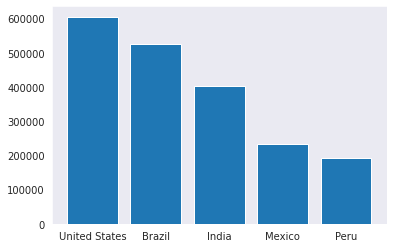

In [335]:
#maior número de mortes acumulado por país
plt.bar('location', 'total_deaths', data=top5_Countries)
plt.show()

Os 5 maiores valores de `locations` mostra o número de mortes se encontra nos continentes da Europa e America do Sul, o que faz total sentido já que os grupos são na verdade um conjunto de vários paises.

In [336]:
top5_locations = df2.loc[df.index == "2021-07-04", ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]

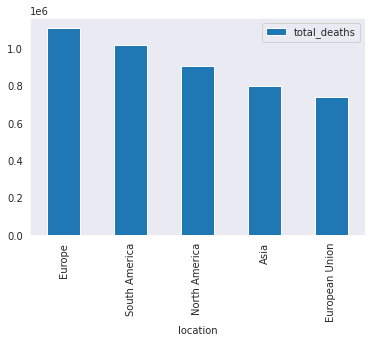

In [337]:
top5_locations.plot(kind="bar", x='location', y='total_deaths')
plt.show()

#### Fumantes e número de mortes
Analisando a relação de pessoas fumantes e o número de mortes vemos que na verdade não existe uma correlação muito forte, na análise gráfica vemos que o sexo masculino possue uma corelaão maior que o publico feminino porém nada conclusivo. 

In [338]:
#Pegando a data mais recente juntamente com os valores NÃO nulos de fumantes(ambos os sexos) e ordenando por mortes por milhão
df_fumo = df2.loc[(df2.index == "2021-07-04") & (df2['male_smokers'].isna() == False) & (df2['female_smokers'].isna() == False) 
& (df2['total_deaths_per_million'] >= 0),['male_smokers', 'female_smokers', 'total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False)[0:]

df_fumo.head()

,male_smokers,female_smokers,total_deaths_per_million
date,,,
2021-07-04,34.8,26.8,3104.649
2021-07-04,47.7,30.2,2946.524
2021-07-04,38.3,30.5,2830.334
2021-07-04,44.4,30.1,2602.597
2021-07-04,47.9,44.0,2571.402


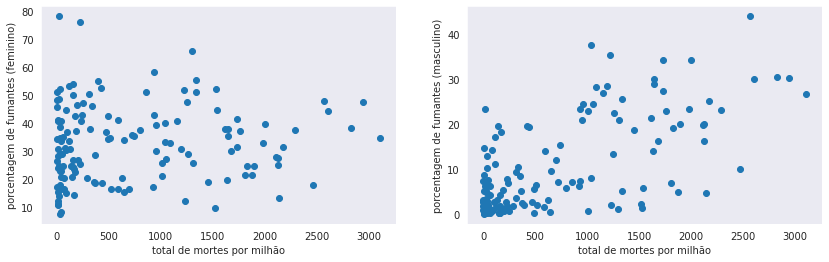

In [339]:
#@title
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
plt.subplot(1,2,1)
plt.scatter(df_fumo.total_deaths_per_million, df_fumo.male_smokers)
plt.ylabel('porcentagem de fumantes (feminino)')
plt.xlabel('total de mortes por milhão')

plt.subplot(1,2,2)
plt.scatter(df_fumo.total_deaths_per_million, df_fumo.female_smokers)
plt.ylabel('porcentagem de fumantes (masculino)')
plt.xlabel('total de mortes por milhão')

plt.show()

#### Renda per capita VS total de casos
Relacionar a renda per capita com o total de casos, a fim de indetificar a contaminação é diferente em paises ricos e pobres.

Como é possivel visualizar no gráfico ordenado por renda, há uma relação do total de casos com reda per capita uma vez que conforme esse indice vai diminuindo aumenta o número de casos. Para que essa relação tenha valor também fazemos a relação de total de casos com IDH(indice de desenvolvimento humano) 

####Total de mortes

In [340]:
#ordenado do 2 elemento para frente, uma vez que o primeiro na lista é o Word e não queremos ver o mundo
#e sim as partes dele.
df_renda = df2.loc[(df2.index == "2021-07-04") & (df2['gdp_per_capita'].isna() == False) 
& (df2['total_cases_per_million'] >= 0),['location', 'gdp_per_capita', 'total_cases_per_million']].sort_values(by='gdp_per_capita', ascending=False)[0:]
print("Renda: \n", df_renda)

Renda: 
                                 location  ...  total_cases_per_million
date                                      ...                         
2021-07-04                         Qatar  ...                77254.205
2021-07-04                    Luxembourg  ...               113472.401
2021-07-04                     Singapore  ...                10703.133
2021-07-04                        Brunei  ...                  598.880
2021-07-04                       Ireland  ...                55552.315
...                                  ...  ...                      ...
2021-07-04                         Niger  ...                  227.458
2021-07-04  Democratic Republic of Congo  ...                  470.973
2021-07-04                       Liberia  ...                  893.691
2021-07-04                       Burundi  ...                  462.039
2021-07-04      Central African Republic  ...                 1478.540

[185 rows x 3 columns]


In [341]:
#pegando somente os dados do array
df_Rarray = df_renda.values

In [342]:
#@title
#normalização do array de renda
Rnormalized1 = (df_Rarray[:,1] - min(df_Rarray[:,1])) / (max(df_Rarray[:,1]) - min(df_Rarray[:,1]))
Rnormalized2 = (df_Rarray[:,2] - min(df_Rarray[:,2])) / (max(df_Rarray[:,2]) - min(df_Rarray[:,2]))

In [343]:
#@title
df01 = pd.DataFrame(df_Rarray[:,0])
df02 = pd.DataFrame(Rnormalized1)
df03 = pd.DataFrame(Rnormalized2)
dfR_unido = pd.concat([df01, df02, df03], axis=1, join='inner')
dfR_unido.set_axis(['pais', 'renda per capita', 'total de casos'], axis=1, inplace=True)
print(dfR_unido)

                             pais renda per capita total de casos
0                           Qatar                1       0.479078
1                      Luxembourg         0.805136       0.703704
2                       Singapore         0.729947       0.066328
3                          Brunei         0.611898     0.00366141
4                         Ireland          0.57342       0.344483
..                            ...              ...            ...
180                         Niger       0.00227703     0.00135785
181  Democratic Republic of Congo       0.00126333     0.00286813
182                       Liberia      0.000787345     0.00548983
183                       Burundi      0.000352485     0.00281272
184      Central African Republic                0     0.00911707

[185 rows x 3 columns]


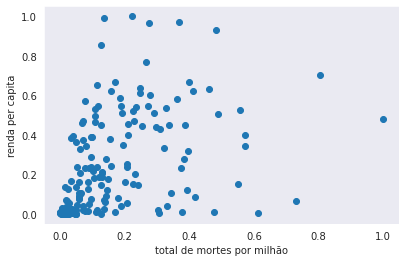

In [344]:
#@title
labels = dfR_unido.pais
y1 = dfR_unido['renda per capita']
y2 = dfR_unido['total de casos']

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14,4))
plt.subplot(1,2,1)
plt.scatter(y1, y2)
plt.ylabel('renda per capita')
plt.xlabel('total de mortes por milhão')


plt.show()

Analisando o IDH pelo número de mortes é possivel considerar que quando o IDH do país é alto há maior casos quando comparado com paises com IDH baixo. Existem vários fatores que podem fazer isso acontecer e analisar somente a relação entre duas variáveis é algo muito superfluo para se ter uma conclução. Alguns desses fatores só pode ser observado por quem vive o dia a dia no local que é algo não perceptivel apenas analisando dados. Uma hipótese formulada pelo autor é de que os paises com IDH mais alto possuem uma melhor estrutura para coletar dados de forma mais precisa, além de ter uma contagem populacional e de infectados mais exata, em comparação com os paises de IDH baixo, da tal são economicamente mais pobres. 

####Total de casos

In [345]:
#filtrando com loc o IDH e totl de casos p/ milhão
df_idh = df2.loc[(df2.index == "2021-07-04") & (df2['human_development_index'].isna() == False) 
& (df2['total_cases_per_million'] >= 0),['location', 'human_development_index', 'total_cases_per_million']].sort_values(by='human_development_index', ascending=False)[1:]
df_idh

,location,human_development_index,total_cases_per_million
date,,,
2021-07-04,Ireland,0.955,55552.315
2021-07-04,Switzerland,0.955,81266.903
2021-07-04,Hong Kong,0.949,1592.906
2021-07-04,Iceland,0.949,19498.901
2021-07-04,Germany,0.947,44620.363
...,...,...,...
2021-07-04,Burundi,0.433,462.039
2021-07-04,South Sudan,0.433,970.722
2021-07-04,Chad,0.398,301.415


In [346]:
#pegando somente os dados do array
df_Iarray = df_idh.values

In [347]:
#normalização do array de IDH e casos por milhão
Inormalized1 = (df_Iarray[:,1] - min(df_Iarray[:,1])) / (max(df_Iarray[:,1]) - min(df_Iarray[:,1]))
Inormalized2 = (df_Iarray[:,2] - min(df_Iarray[:,2])) / (max(df_Iarray[:,2]) - min(df_Iarray[:,2]))

In [348]:
#Unindo em um único array os dados normalizados com os nomes
df01 = pd.DataFrame(df_Iarray[:,0])
df02 = pd.DataFrame(Inormalized1)
df03 = pd.DataFrame(Inormalized2)
dfI_unido = pd.concat([df01, df02, df03], axis=1, join='inner')
dfI_unido.set_axis(['pais', 'IDH', 'total de casos por milhão'], axis=1, inplace=True)
print(dfI_unido)

                         pais         IDH total de casos por milhão
0                     Ireland           1                  0.308363
1                 Switzerland           1                  0.451123
2                   Hong Kong    0.989305                0.00879604
3                     Iceland    0.989305                  0.108205
4                     Germany     0.98574                  0.247672
..                        ...         ...                       ...
181                   Burundi   0.0695187                 0.0025178
182               South Sudan   0.0695187                0.00534186
183                      Chad  0.00713012                0.00162606
184  Central African Republic  0.00534759                0.00816111
185                     Niger           0                0.00121547

[186 rows x 3 columns]


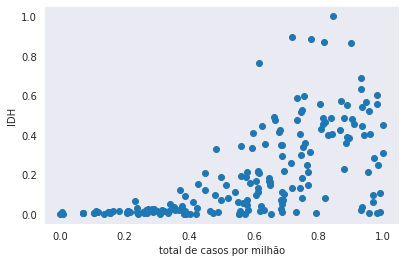

In [369]:
#@title
#plotando o gráfico
labels = dfI_unido.pais
y1 = dfI_unido['IDH']
y2 = dfI_unido['total de casos por milhão']

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14,4))
plt.subplot(1,2,1)
plt.scatter(y1, y2)
plt.ylabel('IDH')
plt.xlabel('total de casos por milhão')


plt.show()

Os dados de  total de casos mostram que paises com IDH maior possuem uma alta taxa de casos registrados, já os paises com IDH baixo tem menos casos registrados. 

In [350]:
df_casos_mundo = df2.loc[(df2.location == 'World')
& (df2['total_cases'] >= 0),['location', 'total_cases']].sort_values(by='total_cases', ascending=False)

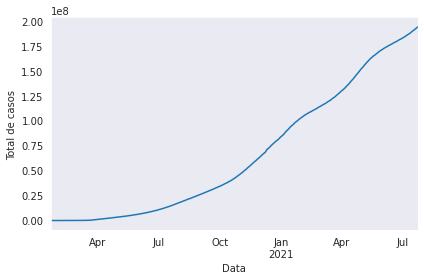

In [370]:
#@title
fig, ax = plt.subplots()

df_casos_mundo['total_cases'].plot(kind='line', ax=ax)
plt.xlabel('Data')
plt.ylabel('Total de casos')
plt.tight_layout()

####Analise exploratória para o Brasil


In [372]:
df_casos_Brasil = df2.loc[(df2.location == 'Brazil')
& (df2['total_cases'] >= 0),['location', 'total_cases']].sort_values(by='total_cases', ascending=False)

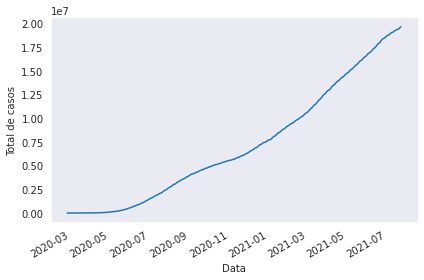

In [373]:
fig, ax = plt.subplots()
df_casos_Brasil['total_cases'].plot(kind='line', ax=ax)
plt.xlabel('Data')
plt.ylabel('Total de casos')
plt.tight_layout()

Até 04/07/2021 o Brasil registrou 18769808.0 casos confirmados de Covid.

In [354]:
import seaborn as sns

In [355]:
df_casos_Brasil.loc[(df_casos_Brasil.index == "2021-07-04"), 'total_cases']

date
2021-07-04    18769808.0
Name: total_cases, dtype: float64

In [356]:
 df_cases = df2.loc[(df.location!="World") & (df.location!="North America") & (df.location!='South America') &
                          (df.location!='Europe') & (df.location!='Africa') & (df.location!="Asia") & (df['location']!="European Union"),
                         ['location', 'total_cases', 'total_cases_per_million']]

In [357]:
df_date = df_cases.reset_index()

Comparado ao resto do mundo o Brasil esta em terceiro lugar na contagem de casos confirmados.

A India se deparou com um surto por conta de pessimas medidas tomadas em relação a pandemia. Em março,o governo Indiano chegou a afirmar que estava na "fase final" da pandemia de Covid-19.

Uma combinação de fatores levou ao atual desastre humanitário, de acordo com o cientista Gautam Menon, em entrevista à agência Deutsche Welle.

"A negligência por parte dos cidadãos e das autoridades fez todos baixarem a guarda. Possíveis reinfecções por causa da perda de anticorpos e o surgimento de novas variantes contribuíram para o surto”, afirmou Menon.

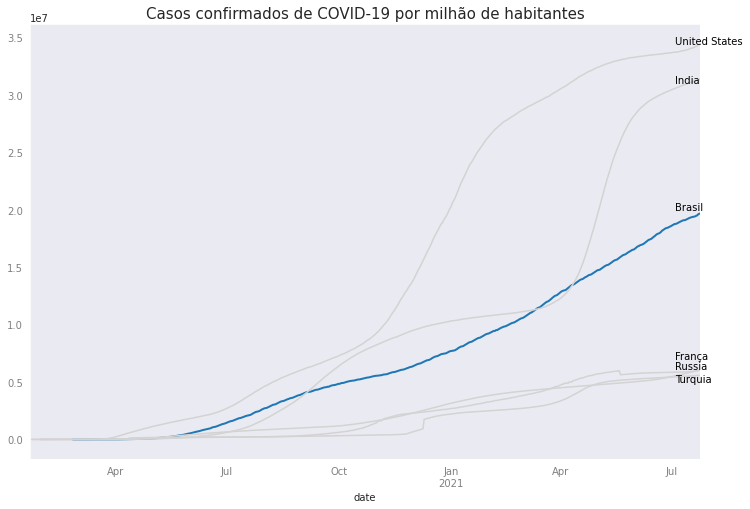

In [358]:
#@title
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('dark')
font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 10}

df_date.loc[df_date.location == 'Brazil'].plot('date', 'total_cases', kind='line', ax=ax, linewidth=2, legend=False)
df_date.loc[df_date.location == 'India'].plot('date', 'total_cases', kind='line', ax=ax, color="lightgray", legend=False)
df_date.loc[df_date.location == 'Russia'].plot('date', 'total_cases', kind='line', ax=ax, color="lightgray", legend=False)
df_date.loc[df_date.location == 'France'].plot('date', 'total_cases', kind='line', ax=ax, color="lightgray", legend=False)
df_date.loc[df_date.location == 'Turkey'].plot('date', 'total_cases', kind='line', ax=ax, color="lightgray", legend=False)
df_date.loc[df_date.location == 'United States'].plot('date', 'total_cases', kind='line', ax=ax, color="lightgray", legend=False)

plt.text(x='2021-07-04', y=20000000, s='Brasil', fontdict=font)
plt.text(x='2021-07-04', y=7000000, s='França', fontdict=font)
plt.text(x='2021-07-04', y=6100000, s='Russia', fontdict=font)
plt.text(x='2021-07-04', y=5000000, s='Turquia', fontdict=font)
plt.text(x='2021-07-04', y=31000000, s='India', fontdict=font)
plt.text(x='2021-07-04', y=34399900, s='United States', fontdict=font)

plt.title("Casos confirmados de COVID-19 por milhão de habitantes", fontsize=15)
plt.xticks(color="gray")
plt.yticks(color="gray")

plt.show()

Vamos analisar a Evolução da Vacinação no Brasil e comparar com os paises que mais vacinam

In [375]:
df_casos_Brasil = df2.loc[(df2.location == 'Brazil')
& (df2['total_cases'] >= 0),['location', 'total_vaccinations']].sort_values(by='total_vaccinations', ascending=False)

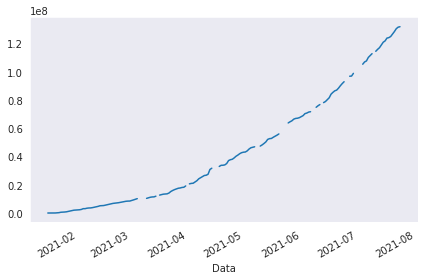

In [376]:
fig, ax = plt.subplots()
df_casos_Brasil['total_vaccinations'].plot(kind='line', ax=ax)
plt.xlabel('Data')
plt.tight_layout()

Em relação ao total de vacinados munidalmente o Brasil se encontra em Quarta posição, apesar de não ser a ideal ainda sim está entre os 10 paises que mais vacina. Até o presente momento(20/07/2021) foram **126643283** vacinas aplicadas



In [361]:
 df_vacina = df2.loc[(df.location!="World") & (df.location!="North America") & (df.location!='South America') &
                          (df.location!='Europe') & (df.location!='Africa') & (df.location!="Asia") & (df['location']!="European Union"),
                         ['location', 'total_vaccinations']]

In [362]:
df_vacina.dropna(inplace=True)

In [363]:
df_vacina = df_vacina.reset_index()

In [364]:
df_vacina.loc[(df_vacina.date == '2021-07-20') & (df_vacina.location == "Brazil"), ['location', 'total_vaccinations']].sort_values(by='total_vaccinations', ascending=False)[0:6]

,location,total_vaccinations
2152,Brazil,126643283.0


In [365]:
df_vacina['total_vaccinations'] = (df_vacina['total_vaccinations'] - min(df_vacina['total_vaccinations'])) / (max(df_vacina['total_vaccinations']) - min(df_vacina['total_vaccinations']))

In [366]:
df_vacina.loc[(df_vacina.date == '2021-07-20'), ['location', 'total_vaccinations']].sort_values(by='total_vaccinations', ascending=False)[0:6]

,location,total_vaccinations
3284,China,0.960861
7152,India,0.270014
17092,United States,0.219984
2152,Brazil,0.082305
5865,Germany,0.056670
16892,United Kingdom,0.053807


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


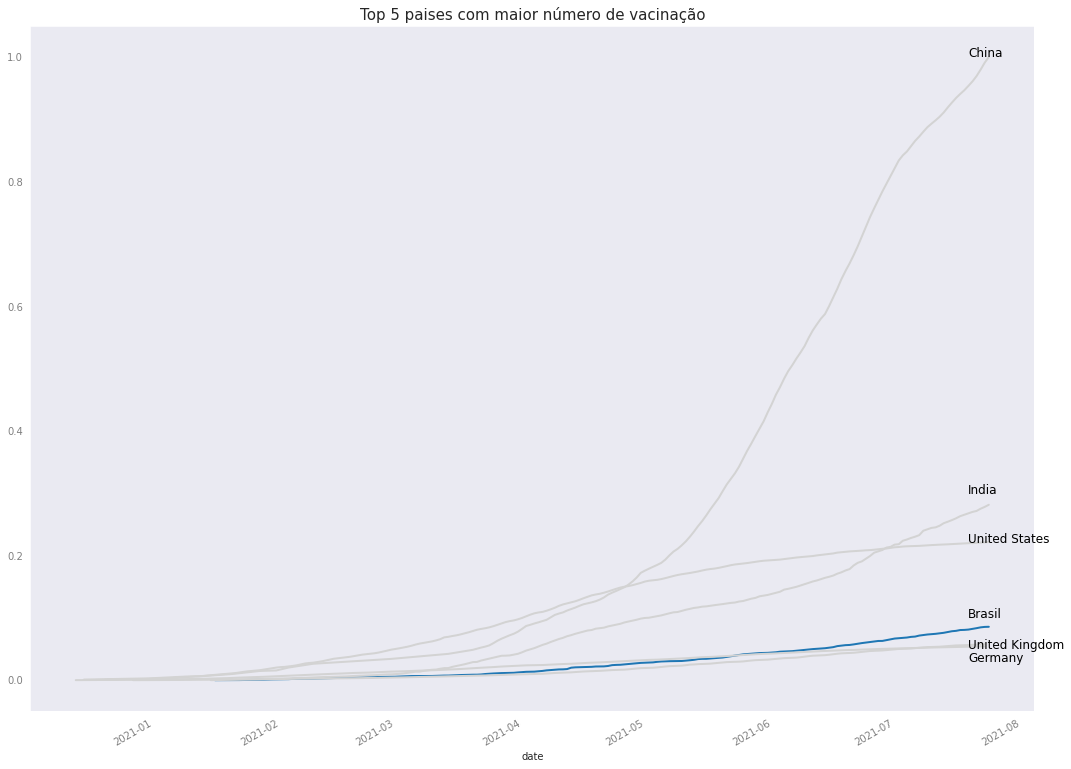

In [377]:
#@title
fig, ax = plt.subplots(figsize=(18,14))
sns.set_style('dark')
font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 12}

df_vacina.loc[df_vacina.location == 'Brazil'].plot('date', 'total_vaccinations', kind='line', lw=2, ax=ax, linewidth=2, legend=False);
df_vacina.loc[df_vacina.location == 'China'].plot('date', 'total_vaccinations', kind='line', lw=2, ax=ax, color="lightgray", legend=False);
df_vacina.loc[df_vacina.location == 'United States'].plot('date', 'total_vaccinations', kind='line', lw=2, ax=ax, color="lightgray", legend=False);
df_vacina.loc[df_vacina.location == 'India'].plot('date', 'total_vaccinations', kind='line', lw=2, ax=ax, color="lightgray", legend=False);
df_vacina.loc[df_vacina.location == 'Germany'].plot('date', 'total_vaccinations', kind='line', lw=2, ax=ax, color="lightgray", legend=False);
df_vacina.loc[df_vacina.location == 'United Kingdom'].plot('date', 'total_vaccinations', kind='line', lw=2, ax=ax, color="lightgray", legend=False);

plt.text(x='2021-07-19', y=0.1, s='Brasil', fontdict=font)
plt.text(x='2021-07-19', y=1, s='China', fontdict=font)
plt.text(x='2021-07-19', y=0.3, s='India', fontdict=font)
plt.text(x='2021-07-19', y=0.22, s='United States', fontdict=font)
plt.text(x='2021-07-19', y=0.03, s='Germany', fontdict=font)
plt.text(x='2021-07-19', y=0.05, s='United Kingdom', fontdict=font)

plt.title("Top 5 paises com maior número de vacinação", fontsize=15)
plt.xticks(color="gray")
plt.yticks(color="gray")

plt.show()

###Previna-se

<center><img alt="Colaboratory logo" width="60%" src="https://www.aemflo-cdlsj.org.br/ckfinder/images/Coronavirus_Prancheta%201.png"></center>